In [67]:
%matplotlib inline

In [68]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
from scipy import linalg as LA
import matplotlib.pyplot as plt
import math

import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 

from IPython.display import display
from time import sleep

In [69]:
class LagrangianPendulum():
  
    # input initial values
    def __init__(self, L1=1.,L2=1., m1=1.,m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g

    #the right side of the equation
    
    def dy_dt(self, t, y):
         
        phi_1, phi_1_dot, phi_2, phi_2_dot = y  #input for initial condition
        delta =phi_1-phi_2
        
        alpha_1 = self.L2/self.L1*self.m2/(self.m1+self.m2)*np.cos(delta)
        alpha_2 = self.L1/self.L2*np.cos(delta)
        function_1 = -self.L2/self.L1*self.m2/(self.m1+self.m2)*phi_2_dot**2*np.sin(delta)-self.g/self.L1*np.sin(phi_1)
        function_2 = self.L1/self.L2*phi_1_dot**2*np.sin(delta)-self.g/self.L2*np.sin(phi_2)
      
        phi_1_dot_dot = (function_1-alpha_1*function_2)/(1-alpha_1*alpha_2)
        phi_2_dot_dot = (-alpha_2*function_1+function_2)/(1-alpha_1*alpha_2)
        
        return phi_1_dot, phi_1_dot_dot, phi_2_dot, phi_2_dot_dot
    
    
    #solve the differentital equation
    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, phi_1_dot, phi_2, phi_2_dot = solution.y

        return phi_1, phi_1_dot, phi_2, phi_2_dot

In [70]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [71]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

# When the inital angle is small, which correspond to question a

In [72]:
#input intial condition
L1=1.
L2=1.
m1=1.
m2=1.
g=1.
t_start=0
t_end= 50
delta_t=0.1
t_pts = np.arange(t_start, t_end+delta_t, delta_t)  
phi_1_start=math.pi/18000
phi_1_dot_start=0.
phi_2_start=math.pi/9000
phi_2_dot_start=0.

pen=LagrangianPendulum(L1,L2,m1,m2,g)

phi_1, phi_1_dot, phi_2, phi_2_dot=pen.solve_ode(t_pts,phi_1_start,phi_1_dot_start,phi_2_start,phi_2_dot_start)

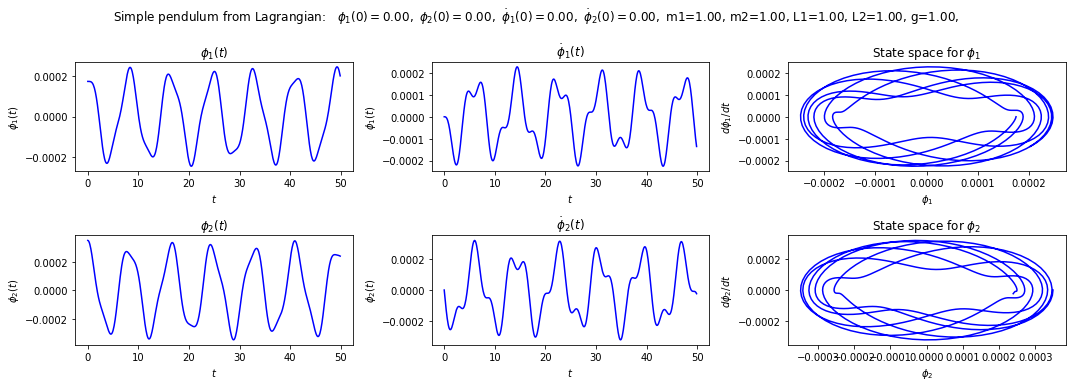

In [73]:
#lable for the phi_1
phi_vs_time_labels_1 = (r'$t$', r'$\phi_1(t)$')
phi_dot_vs_time_labels_1 = (r'$t$', r'$d\phi_1/dt(t)$')
state_space_labels_1 = (r'$\phi_1$', r'$d\phi_1/dt$')

#lable for phi_2
phi_vs_time_labels_2 = (r'$t$', r'$\phi_2(t)$')
phi_dot_vs_time_labels_2 = (r'$t$', r'$d\phi_2/dt(t)$')
state_space_labels_2 = (r'$\phi_2$', r'$d\phi_2/dt$')

fig=plt.figure(figsize=(15,5))
overall_title = 'Simple pendulum from Lagrangian:  ' + \
                rf' $\phi_1(0)={phi_1_start:.2f},$' + \
                rf' $\phi_2(0)={phi_2_start:.2f},$' + \
                rf' $\dot\phi_1(0)={phi_1_dot_start:.2f},$' + \
                rf' $\dot\phi_2(0)={phi_1_dot_start:.2f},$' + \
                rf' m1={m1:.2f},' + \
                rf' m2={m2:.2f},' + \
                rf' L1={L1:.2f},' + \
                rf' L2={L2:.2f},' + \
                rf' g={g:.2f},' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

y_1= phi_1_start*np.ones((5000))
y_2 = phi_2_start*np.ones((5000))

#first plot for phi_1
ax_a = fig.add_subplot(2,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels_1, 
            color='blue',
            label=None, 
            title=r'$\phi_1(t)$', 
            ax=ax_a)    
                     
#second plot for phi_1_dot    
ax_b = fig.add_subplot(2,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_1_dot[start : stop], 
            axis_labels=phi_vs_time_labels_1, 
            color='blue',
            label=None, 
            title=r'$\dot\phi_1(t)$', 
            ax=ax_b)    

# third plot: state space plot for phi_1  
ax_c = fig.add_subplot(2,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi_1[start : stop], phi_1_dot[start : stop], 
            axis_labels=state_space_labels_1, 
            color='blue',
            label=None, 
            title='State space for $\phi_1$', 
            ax=ax_c)    

fig.tight_layout()
fig.savefig('simple_pendulum_Lagrange.png', bbox_inches='tight')  


#fourth plot: phi_2 versuse time
ax_a = fig.add_subplot(2,3,4)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi_vs_time_labels_2, 
            color='blue',
            label=None, 
            title=r'$\phi_2(t)$', 
            ax=ax_a)    
                              
#fifth plot: phi_2_dot versus time    
ax_b = fig.add_subplot(2,3,5)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_2_dot[start : stop], 
            axis_labels=phi_vs_time_labels_2, 
            color='blue',
            label=None, 
            title=r'$\dot\phi_2(t)$', 
            ax=ax_b)    

# sixth plot: state space plot from t=30 to t=50   
ax_c = fig.add_subplot(2,3,6)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi_2[start : stop], phi_2_dot[start : stop], 
            axis_labels=state_space_labels_2, 
            color='blue',
            label=None, 
            title='State space for $\phi_2$', 
            ax=ax_c)    

fig.tight_layout()
fig.savefig('simple_pendulum_Lagrange.png', bbox_inches='tight')  


# this section shows when the inital angle was large, the final result in chaotic for question b

In [145]:
#input intial condition
L1=1.
L2=1.
m1=1.
m2=1.
g=1.
t_start=0
t_end= 50
delta_t=0.1
t_pts = np.arange(t_start, t_end+delta_t, delta_t)  
phi_1_start=math.pi/2
phi_1_dot_start=0.
phi_2_start=math.pi
phi_2_dot_start=0.

pen=LagrangianPendulum(L1,L2,m1,m2,g)

phi_1, phi_1_dot, phi_2, phi_2_dot=pen.solve_ode(t_pts,phi_1_start,phi_1_dot_start,phi_2_start,phi_2_dot_start)

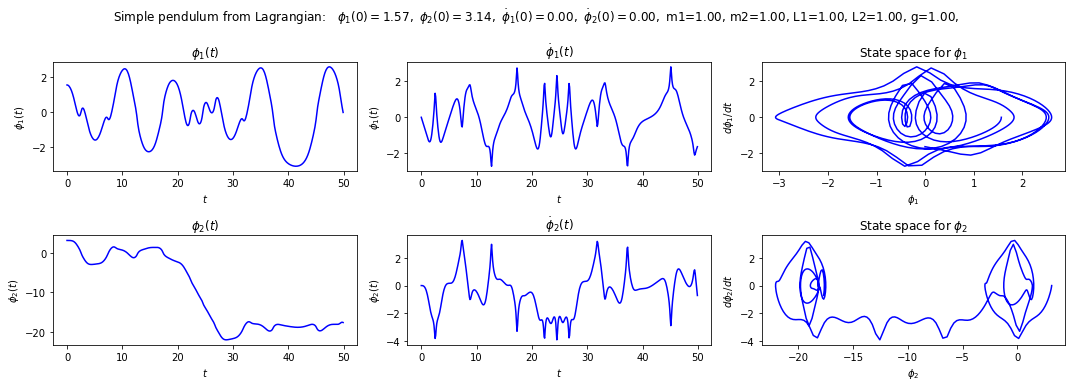

In [146]:
#lable for the phi_1
phi_vs_time_labels_1 = (r'$t$', r'$\phi_1(t)$')
phi_dot_vs_time_labels_1 = (r'$t$', r'$d\phi_1/dt(t)$')
state_space_labels_1 = (r'$\phi_1$', r'$d\phi_1/dt$')

#lable for phi_2
phi_vs_time_labels_2 = (r'$t$', r'$\phi_2(t)$')
phi_dot_vs_time_labels_2 = (r'$t$', r'$d\phi_2/dt(t)$')
state_space_labels_2 = (r'$\phi_2$', r'$d\phi_2/dt$')

fig=plt.figure(figsize=(15,5))
overall_title = 'Simple pendulum from Lagrangian:  ' + \
                rf' $\phi_1(0)={phi_1_start:.2f},$' + \
                rf' $\phi_2(0)={phi_2_start:.2f},$' + \
                rf' $\dot\phi_1(0)={phi_1_dot_start:.2f},$' + \
                rf' $\dot\phi_2(0)={phi_1_dot_start:.2f},$' + \
                rf' m1={m1:.2f},' + \
                rf' m2={m2:.2f},' + \
                rf' L1={L1:.2f},' + \
                rf' L2={L2:.2f},' + \
                rf' g={g:.2f},' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

y_1= phi_1_start*np.ones((5000))
y_2 = phi_2_start*np.ones((5000))

#first plot for phi_1
ax_a = fig.add_subplot(2,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels_1, 
            color='blue',
            label=None, 
            title=r'$\phi_1(t)$', 
            ax=ax_a)    
                     
#second plot for phi_1_dot    
ax_b = fig.add_subplot(2,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_1_dot[start : stop], 
            axis_labels=phi_vs_time_labels_1, 
            color='blue',
            label=None, 
            title=r'$\dot\phi_1(t)$', 
            ax=ax_b)    

# third plot: state space plot for phi_1  
ax_c = fig.add_subplot(2,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi_1[start : stop], phi_1_dot[start : stop], 
            axis_labels=state_space_labels_1, 
            color='blue',
            label=None, 
            title='State space for $\phi_1$', 
            ax=ax_c)    

fig.tight_layout()
fig.savefig('simple_pendulum_Lagrange.png', bbox_inches='tight')  


#fourth plot: phi_2 versuse time
ax_a = fig.add_subplot(2,3,4)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi_vs_time_labels_2, 
            color='blue',
            label=None, 
            title=r'$\phi_2(t)$', 
            ax=ax_a)    
                              
#fifth plot: phi_2_dot versus time    
ax_b = fig.add_subplot(2,3,5)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_2_dot[start : stop], 
            axis_labels=phi_vs_time_labels_2, 
            color='blue',
            label=None, 
            title=r'$\dot\phi_2(t)$', 
            ax=ax_b)    

# sixth plot: state space plot from t=30 to t=50   
ax_c = fig.add_subplot(2,3,6)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi_2[start : stop], phi_2_dot[start : stop], 
            axis_labels=state_space_labels_2, 
            color='blue',
            label=None, 
            title='State space for $\phi_2$', 
            ax=ax_c)    

fig.tight_layout()
fig.savefig('simple_pendulum_Lagrange.png', bbox_inches='tight')  


# now it is time for animation

In [137]:
def update_plot(t_start=0.,t_end=0.,delta_t=0.,L1=1.0, L2=1., m1=0., m2=0., g=0.,phi_1_start=0.,phi_1_dot_start=0.,phi_2_start=0.,phi_2_dot_start=0.):
    
    t_pts=np.arange(t_start,t_end+delta_t,delta_t)
    p1=LagrangianPendulum(L1,L2,m1,m2,g)
    phi_1, phi_1_dot, phi_2, phi_2_dot=p1.solve_ode(t_pts,phi_1_start,phi_1_dot_start,phi_2_start,phi_2_dot_start)
    
    
    
    phi_vs_time_labels_1 = (r'$t$', r'$\phi_1(t)$')
    phi_dot_vs_time_labels_1 = (r'$t$', r'$d\phi_1/dt(t)$')
    state_space_labels_1 = (r'$\phi_1$', r'$d\phi_1/dt$')

#lable for phi_2
    phi_vs_time_labels_2 = (r'$t$', r'$\phi_2(t)$')
    phi_dot_vs_time_labels_2 = (r'$t$', r'$d\phi_2/dt(t)$')
    state_space_labels_2 = (r'$\phi_2$', r'$d\phi_2/dt$')

    fig=plt.figure(figsize=(15,5))
    overall_title = 'Simple pendulum from Lagrangian:  ' + \
                rf' $\phi_1(0)={phi_1_start:.2f},$' + \
                rf' $\phi_2(0)={phi_2_start:.2f},$' + \
                rf' $\dot\phi_1(0)={phi_1_dot_start:.2f},$' + \
                rf' $\dot\phi_2(0)={phi_1_dot_start:.2f},$' + \
                rf' m1={m1:.2f},' + \
                rf' m2={m2:.2f},' + \
                rf' L1={L1:.2f},' + \
                rf' L2={L2:.2f},' + \
                rf' g={g:.2f},' + \
                '\n'     # \n means a new line (adds some space here)
    fig.suptitle(overall_title, va='baseline')

#first plot for phi_1
    ax_a = fig.add_subplot(2,3,1)                  

    start, stop = start_stop_indices(t_pts, t_start, t_end)    
    plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels_1, 
            color='blue',
            label=None, 
            title=r'$\phi_1(t)$', 
            ax=ax_a)    
                     
#second plot for phi_1_dot    
    ax_b = fig.add_subplot(2,3,2)                  

    start, stop = start_stop_indices(t_pts, t_start, t_end)    
    plot_y_vs_x(t_pts[start : stop], phi_1_dot[start : stop], 
            axis_labels=phi_vs_time_labels_1, 
            color='blue',
            label=None, 
            title=r'$\dot\phi_1(t)$', 
            ax=ax_b)    

# third plot: state space plot for phi_1  
    ax_c = fig.add_subplot(2,3,3)                  

    start, stop = start_stop_indices(t_pts, t_start, t_end)    
    plot_y_vs_x(phi_1[start : stop], phi_1_dot[start : stop], 
            axis_labels=state_space_labels_1, 
            color='blue',
            label=None, 
            title='State space for $\phi_1$', 
            ax=ax_c)    

    

#fourth plot: phi_2 versuse time
    ax_a = fig.add_subplot(2,3,4)                  

    start, stop = start_stop_indices(t_pts, t_start, t_end)    
    plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi_vs_time_labels_2, 
            color='blue',
            label=None, 
            title=r'$\phi_2(t)$', 
            ax=ax_a)    
                              
#fifth plot: phi_2_dot versus time    
    ax_b = fig.add_subplot(2,3,5)                  

    start, stop = start_stop_indices(t_pts, t_start, t_end)    
    plot_y_vs_x(t_pts[start : stop], phi_2_dot[start : stop], 
            axis_labels=phi_vs_time_labels_2, 
            color='blue',
            label=None, 
            title=r'$\dot\phi_2(t)$', 
            ax=ax_b)    

# sixth plot: state space plot from t=30 to t=50   
    ax_c = fig.add_subplot(2,3,6)                  

    start, stop = start_stop_indices(t_pts, t_start, t_end)    
    plot_y_vs_x(phi_2[start : stop], phi_2_dot[start : stop], 
            axis_labels=state_space_labels_2, 
            color='blue',
            label=None, 
            title='State space for $\phi_2$', 
            ax=ax_c)    

    fig.tight_layout()
    fig.savefig('simple_pendulum_Lagrange.png', bbox_inches='tight')  

In [138]:
slider_border = Layout(border='solid 1.0px')

def float_widget(value, min, max, step, description, format):
    """Makes a FloatSlider with the passed parameters and continuous_update
       set to False."""
    return FloatSlider(value=value, min=min, max=max, step=step,
                       disabled=False,
                       description=description, continuous_update=False,
                       orientation='horizontal', layout=slider_border,
                       readout=True, readout_format=format)

In [151]:
L1=float_widget(value=1., min=1. ,max=10., step=0.1,
                       description=r'$L1$ :', format='.1f')
L2=float_widget(value=1., min=1. ,max=10., step=0.1,
                       description=r'$L2$ :', format='.1f')
m1=float_widget(value=1., min=1. ,max=10., step=0.1,
                       description=r'$m1$ :', format='.1f')
m2=float_widget(value=1., min=1. ,max=10., step=0.1,
                       description=r'$m2$ :', format='.1f')
g=float_widget(value=1., min=1 ,max=10., step=0.1,
                       description=r'$g$ :', format='.1f')
phi1_start=float_widget(value=1., min=math.pi/18000 ,max=math.pi/2, step=0.1,
                       description=r'$\phi_1$ :', format='.1f')
phi2_start=float_widget(value=1., min=math.pi/18000 ,max=math.pi, step=0.1,
                       description=r'$\phi_2$ :', format='.1f')
phi1_dot_start=float_widget(value=0., min=-5. ,max=5., step=0.1,
                       description=r'$\dot\phi_1$ :', format='.1f')
phi2_dot_start=float_widget(value=0., min=-5 ,max=5., step=0.1,
                       description=r'$\dot\phi_2$ :', format='.1f')
t_min_w = float_widget(value=0.0, min=0.0, max=10., step=0.1,
                       description=r'$t_{\rm min}$ :', format='.1f')

t_max_w = float_widget(value=50.0, min=10., max=100., step=0.1,
                       description=r'$t_{\rm max}$ :', format='.1f')

delta = float_widget(value=0.1, min=0.01, max=0.2, step=0.1,
                       description=r'$t_{\delta }$ :', format='.1f')



In [152]:
plot_out = widgets.interactive_output (update_plot,dict(t_start=t_min_w,t_end=t_max_w,delta_t=delta,L1=L1,L2=L2,m1=m1,m2=m2,g=g,phi_1_start=phi1_start,phi_1_dot_start=phi1_dot_start,phi_2_start=phi2_start, phi_2_dot_start=phi2_dot_start))

In [153]:
hbox_1=HBox([L1,L2,m1])
hbox_2=HBox([m2,g,phi1_start])
hbox_3=HBox([phi2_start,phi1_dot_start,phi2_dot_start])
hbox_4=HBox([t_min_w,t_max_w,delta])
UI_box=VBox([hbox_1,hbox_2,hbox_3,hbox_4,plot_out])

In [154]:
display(UI_box)